# Titanic: Machine Learning from Disaster

### By- Jeeten Patel

## A. Feature analysis
#### Importing libraries

In [16]:
#Data analysis
import numpy as np
import pandas as pd

#Data visualization
import plotly.express as px #Interactive graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [17]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

#### Reading & loading csv files

In [18]:
path1 ='../input/titanic/train.csv'
path2 ='../input/titanic/test.csv'
df_train=pd.read_csv(path1)
df_test=pd.read_csv(path2)

#### Quick analysis of csv

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


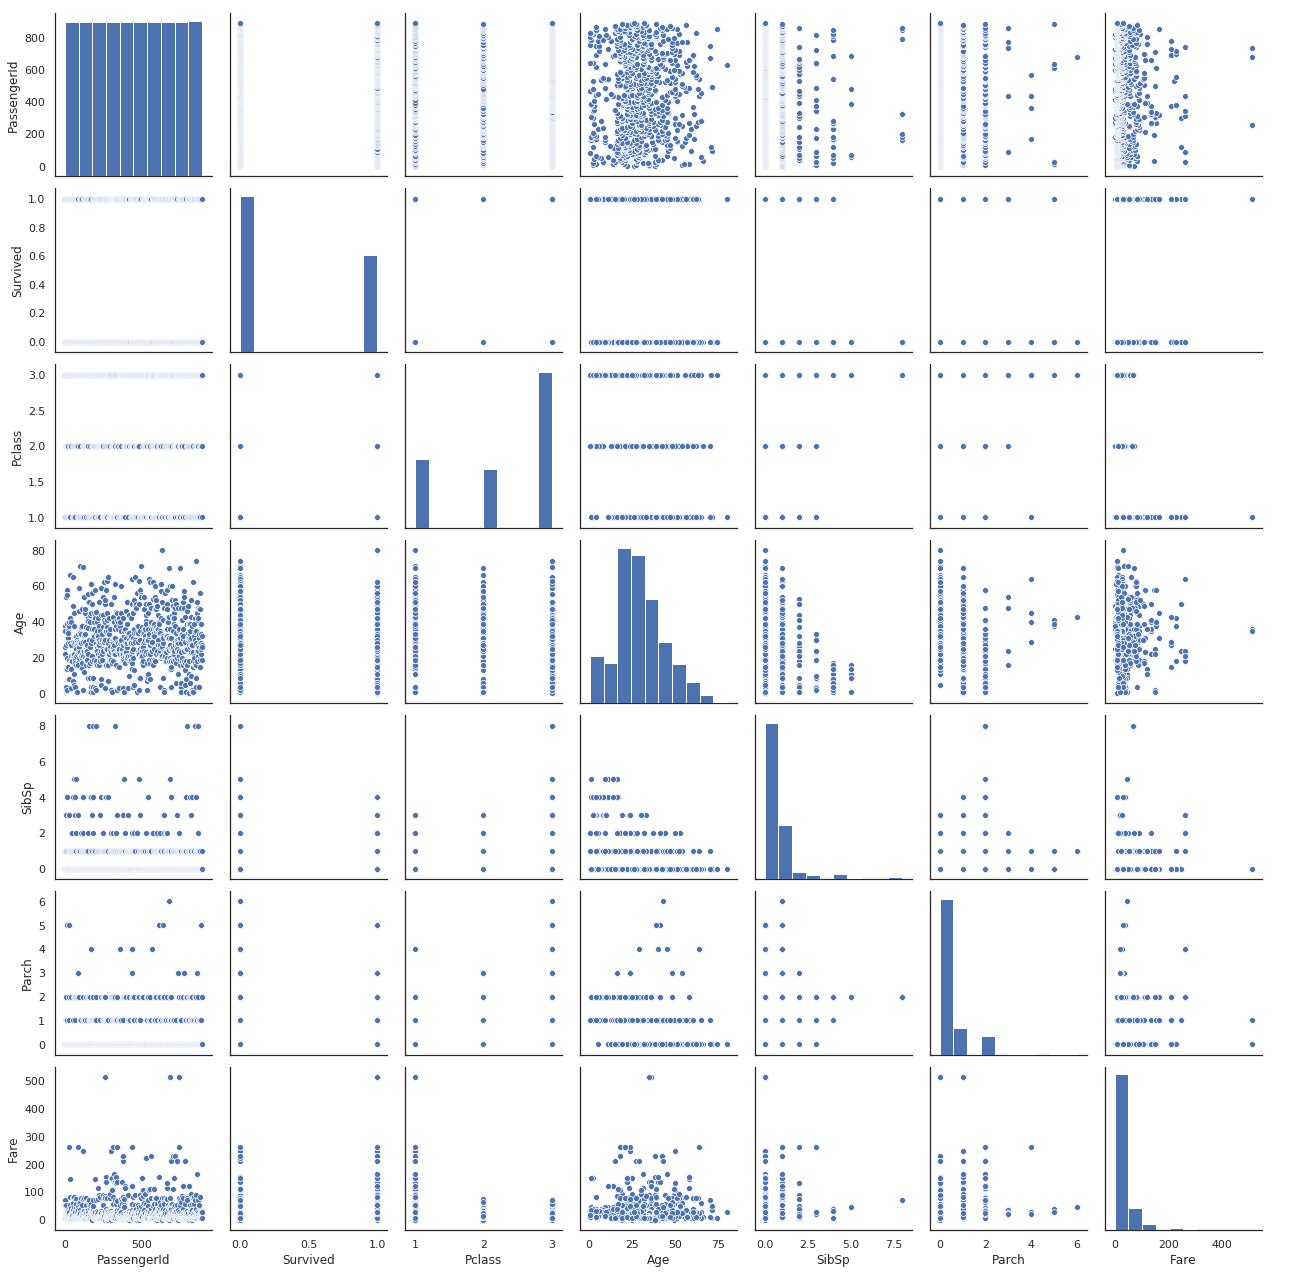

In [22]:
sns.pairplot(df_train)

## B. Data Wrangling

#### Null and missing values filling

In [23]:
#Idetifying null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df_train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [25]:
df_train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [26]:
df_train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

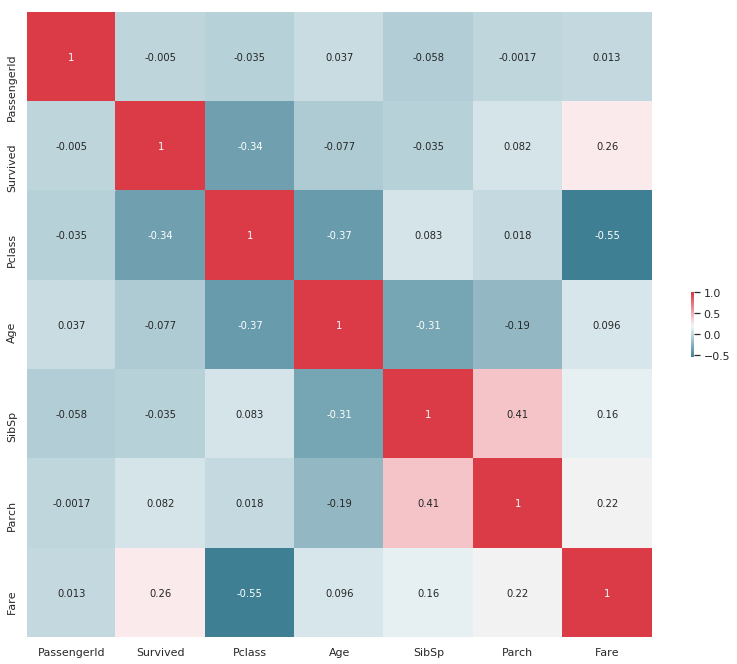

In [27]:
### Correlation matrix for identifying highest correlation with df['Age'] column
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize =( 14 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .1 },ax=ax,annot = True,annot_kws = {'fontsize':10})
plot_correlation_map(df_train)

In [28]:
# From above correlation table we found Age & Pclass correlation to be maximum
# Vilion plot are best 
fig = px.violin(df_train, y="Age", x="Pclass", color="Sex", box=True, points="all", hover_data=df_train.columns,title='Pclass vs Age')
fig.show()

In [29]:
#Heatmap
fig = px.density_heatmap(df_train, x="Age", y="Pclass", marginal_x="rug", marginal_y="histogram")
fig.show()

In [30]:
#Mean
df_train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [31]:
#Median
df_train.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [32]:
#Optional
#import math
#def missingvalues(col):
#    for i,j in zip(col.columns[0],col.columns[1]):
#        if math.isnan(i)==True:
#            if j==1:
#                i=df_train.groupby(['Pclass'])['Age'].median()[1]
#            elif j==2:
#                    i=df_train.groupby(['Pclass'])['Age'].median()[2]
#            else:
#                i=df_train.groupby(['Pclass'])['Age'].median()[3]
#    return(i,j)
#
# OR
#df.Age.fillna(df_train.groupby(['Pclass','Sex']).transform('median').Age)

#### Creating Title Column
#Note: Above code can be excuted to fill Nan value in age column with age.mean() or age.median() in accordance to Pclass. But one can futher divide this age column according to title(eg. Mr. Mrs. Miss etc) 

In [33]:
df_train['Title']=df_train['Name'].apply(lambda x: x.split(',')[1][1:int(x.split(',')[1].find('.'))])
df_test['Title']=df_test['Name'].apply(lambda x: x.split(',')[1][1:int(x.split(',')[1].find('.'))])

titles={"Capt":"Officer","Col":"Officer","Major":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir":"Royalty",
"Dr":"Officer","Rev":"Officer","the Countess":"Royalty","Dona":"Royalty","Mme":"Mrs","Mlle":"Miss","Ms":"Mrs","Mr":"Mr","Mrs":"Mrs",
 "Miss":"Miss","Master":"Master","Lady":"Royalty"}

for i in titles:
    df_train['Title']=df_train['Title'].replace(to_replace=i,value=titles[i])
df_train

for i in titles:
    df_test['Title']=df_test['Title'].replace(to_replace=i,value=titles[i])
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [34]:
df_train['Title'].value_counts()
df_test['Title'].value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64

Filling of Age column nan values

In [35]:
#Replacing nan values as per [(male or female) & (five above catergories)] both Age median
df_train.Age.fillna(df_train.groupby(['Sex','Title','Pclass']).transform('median').Age,inplace=True)
df_test.Age.fillna(df_test.groupby(['Sex','Title','Pclass']).transform('median').Age,inplace=True)

Filling of Embarked column nan values

In [36]:
#Replacing nan values with S since there are only 2 missing
df_train[df_train.Embarked.isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [37]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
df_train.Embarked.fillna('S',inplace=True)
df_test.Embarked.fillna('S',inplace=True)

In [39]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null objec

Column Analysis

Tests:
SVC
Decision Tree
AdaBoost
Random Forest
Extra Trees
Gradient Boosting
Multiple layer perceprton (neural network)
KNN
Logistic regression
Linear Discriminant Analysis

In [40]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [44]:
features = ["Pclass","SibSp","Parch","Sex","Age","Embarked"]
y = df_train["Survived"]
X = pd.get_dummies(df_train[features])

X_train = pd.get_dummies(df_train[features])
y_train = df_train["Survived"]

df_train["Survived"] = df_train["Survived"].astype(int)

X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X,y)
print(model.feature_importances_)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

[1.38526426e-01 2.42857969e-02 2.20763788e-02 4.79438599e-02
 4.11633251e-01 3.20360043e-01 2.63487904e-02 2.73004256e-04
 8.55244953e-03]
X_train shape: (891, 9)
y_train shape: (891,)
X_test shape: (418, 9)


In [45]:
from sklearn.tree import DecisionTreeClassifier
modeln  = DecisionTreeClassifier()
modeln.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
kfold = StratifiedKFold(n_splits=10)

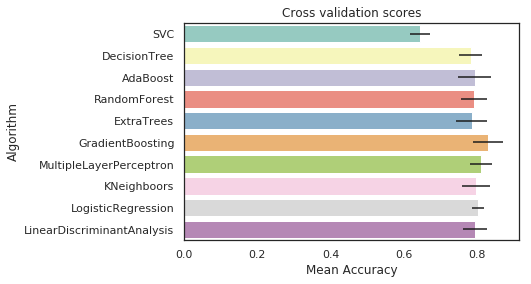

In [47]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [49]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.2min finished


0.8193133583021224

In [50]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

NameError: name 'Y_train' is not defined

In [ ]:
prediction = gsGBC.predict(X_test)
output = pd.DataFrame({"PassengerID": df_test.PassengerId, "Survived": prediction})
output.to_csv('my_subs.csv', index=False)
print("submission saved!!!")